In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Conv2D,MaxPool2D, Dense, Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications .mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential  
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from glob import glob
import numpy as np 
import cv2

In [2]:
size=[224,224]

In [3]:
history = History()

In [4]:
train_data='mixdataset/train'
val_data='mixdataset/validation'

In [90]:
test_data='orginaldataset/test1'

In [6]:
MN =MobileNetV2(input_shape=size+[3], weights='imagenet',include_top=False)

In [ ]:
vgg =VGG16(input_shape=size+[3], weights='imagenet',include_top=False)

In [7]:
MN.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [8]:
for layer in MN.layers:
    layer.trainable= False

In [9]:
MN.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [10]:
dirct= glob('mixdataset/train/*')

In [11]:
x=Flatten()(MN.output)

In [12]:
prediction=Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.0005),name='fc1')(x)
prediction=Dropout(0.3)(prediction)
prediction=Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0005),name='fc2')(prediction)
prediction=Dropout(0.2)(prediction)
prediction=Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.0005),name='fc3')(prediction)
prediction=Dense(len(dirct),activation='softmax',name='predictions')(prediction)

In [13]:
model=Model(inputs=MN.input,outputs=prediction)

In [14]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [15]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
train_datapro=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [17]:
val_datapro=ImageDataGenerator(rescale=1/255)

In [18]:
test_datapro=ImageDataGenerator(rescale=1/255)

In [19]:
training_set= train_datapro.flow_from_directory( train_data,target_size=(224,224),batch_size =32,class_mode='categorical',shuffle=True)

Found 3129 images belonging to 7 classes.


In [20]:
val_set= val_datapro.flow_from_directory( val_data,target_size=(224,224),batch_size =32,class_mode='categorical',shuffle=True)

Found 354 images belonging to 7 classes.


In [91]:
test_set= test_datapro.flow_from_directory( test_data,target_size=(224,224),class_mode='categorical',shuffle=True)

Found 4 images belonging to 4 classes.


In [22]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [23]:
val_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [92]:
test_set.class_indices

{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}

In [25]:
train=model.fit(training_set,validation_data=val_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(val_set),callbacks=[history]
)

Epoch 1/5
98/98 [==============================] - 173s 2s/step - loss: 3.9114 - accuracy: 0.1691 - val_loss: 2.1128 - val_accuracy: 0.1695
Epoch 2/5
98/98 [==============================] - 176s 2s/step - loss: 2.0963 - accuracy: 0.1911 - val_loss: 2.0415 - val_accuracy: 0.2090
Epoch 3/5
98/98 [==============================] - 169s 2s/step - loss: 2.0303 - accuracy: 0.2100 - val_loss: 1.9433 - val_accuracy: 0.2232
Epoch 4/5
98/98 [==============================] - 156s 2s/step - loss: 1.9937 - accuracy: 0.2128 - val_loss: 1.9759 - val_accuracy: 0.2090
Epoch 5/5
98/98 [==============================] - 158s 2s/step - loss: 1.9430 - accuracy: 0.2285 - val_loss: 1.8727 - val_accuracy: 0.2260


In [26]:
model.save('emotionRecog5e.h5')

# Testing the model using graph 

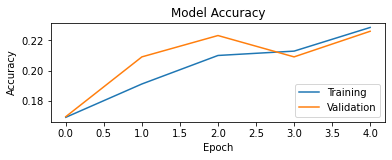

In [33]:
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

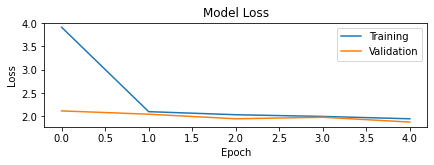

In [34]:
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.tight_layout()


# Testing the model using image 

In [94]:
frame = cv2.imread('C:/Users/dada9/Pictures/sad.jpg')

In [95]:
import cv2

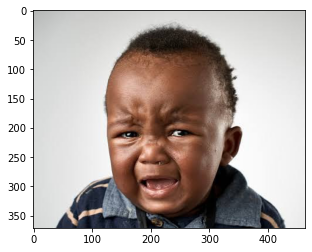

In [96]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [97]:
bim=cv2.resize(frame,(224,224))
bim=np.expand_dims(bim,axis = 0)
bim=bim/255.0

In [98]:
predictt=model.predict(bim)

In [99]:
predictt[0]

array([2.2432860e-04, 3.7258649e-01, 6.2628400e-01, 9.0513297e-04],
      dtype=float32)

In [100]:
np.argmax(predictt)

2

# Testing the model using test dataset

In [ ]:
model= tf.keras.models.load_model('model/emotionRecog.h5')

In [ ]:
eve=model.evaluate(test_set)